<div style="border:solid green 3px; padding: 20px">
																							
<b>Привет!</b>
																					
Меня зовут Сороколетов Илья и я буду проверять твой проект. 
																					
Предлагаю общаться на «**ты**», но если тебе будет комфортнее общаться на «**вы**», то сообщи об этом в комментариях)
																					
																					
Для твоего удобства, я буду выделять свои комментарии следующим образом:
																					
<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> Самые важные замечания. Они указывают на ключевые моменты, которые влияют на конечный результат проекта. </div>
																					
<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> Советы или замечания, которые помогут сделать твою работу лучше, но необязательны к выполнению.
																					
</div>
																					
<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> Так я выделяю все остальные комментарии.</div>
																					
																					
Пометками <b>v1-v2-v3-...</b> я буду отмечать версию проверки. Так ты сможешь быстро найти мои новые комментарии.
																					
Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения, например вот так:
																					    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
</div>
																					
<b>Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии.</b> Если ты оставляешь свои комментарии, то делай это под моими, чтобы сообщения были расположены в хронологическом порядке. Всё это поможет выполнить повторную проверку твоего проекта быстрее. 
																					
Перед отправкой работы я рекомендую нажимать Kernel -> Restart & Run All. Это перезапустит ядро и по очереди выполнит все ячейки. Так ты сможешь проверить, что всё работает корректно. Кнопка Kernel находится в панели сверху
																					
Обязательно задавай вопросы если они возникнут, а я перехожу к проверке)
																					
P.S. На всякий случай, я оставлю пустой шаблон для твоих комментариев ниже. Кликни два раза на мой комментарий, скопируй последние четыре строчки кода и вставляй их в пустую ячейку там, где ты хочешь оставить комментарий. Не забудь только перед этим сменить тип ячейки на Markdown. Быстро это можно сделать так: кликнуть на ячейку - нажать ESC - нажать M. 
																					    
																					    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Удали этот текст и вместо него напиши свой комментарий 🙂
</div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [1]:
!python -m pip install Levenshtein

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from Levenshtein import distance
from datetime import datetime as dt

try:
    data = pd.read_csv(r"C:\Users\yka\Documents\Practicum\DS_Practicum\Real_Estate_Price_Prediction\source\real_estate_data.csv", sep='\t', header=0)
except:
    data = pd.read_csv("/datasets/real_estate_data.csv", sep='\t', header=0)

pd.set_option('display.max_columns', None)
data.head(20)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<div class="alert alert-danger">
<b>❌ Комментарий ревьюера:</b> 
<br>Если ты используешь более новые версии библиотек или библиотеки, которых нет у нас на платформе, то нужно добавить код, который обновит или установит их до той версии, которая у тебя. Поправь, пожалуйста, чтобы я мог проверить твой проект.
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Добавил установку нужной библиотеки
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Теперь всё работает) Перехожу к проверке!
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Все библиотеки лучше импортировать отдельно в первой ячейке. Это позволит тебе в любой момент добавить ещё одну библиотеку без перезаписи переменных.
</div>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Так как данные занимают отностиельно мало места в памяти, нет смысла в оптимизации типов данных.

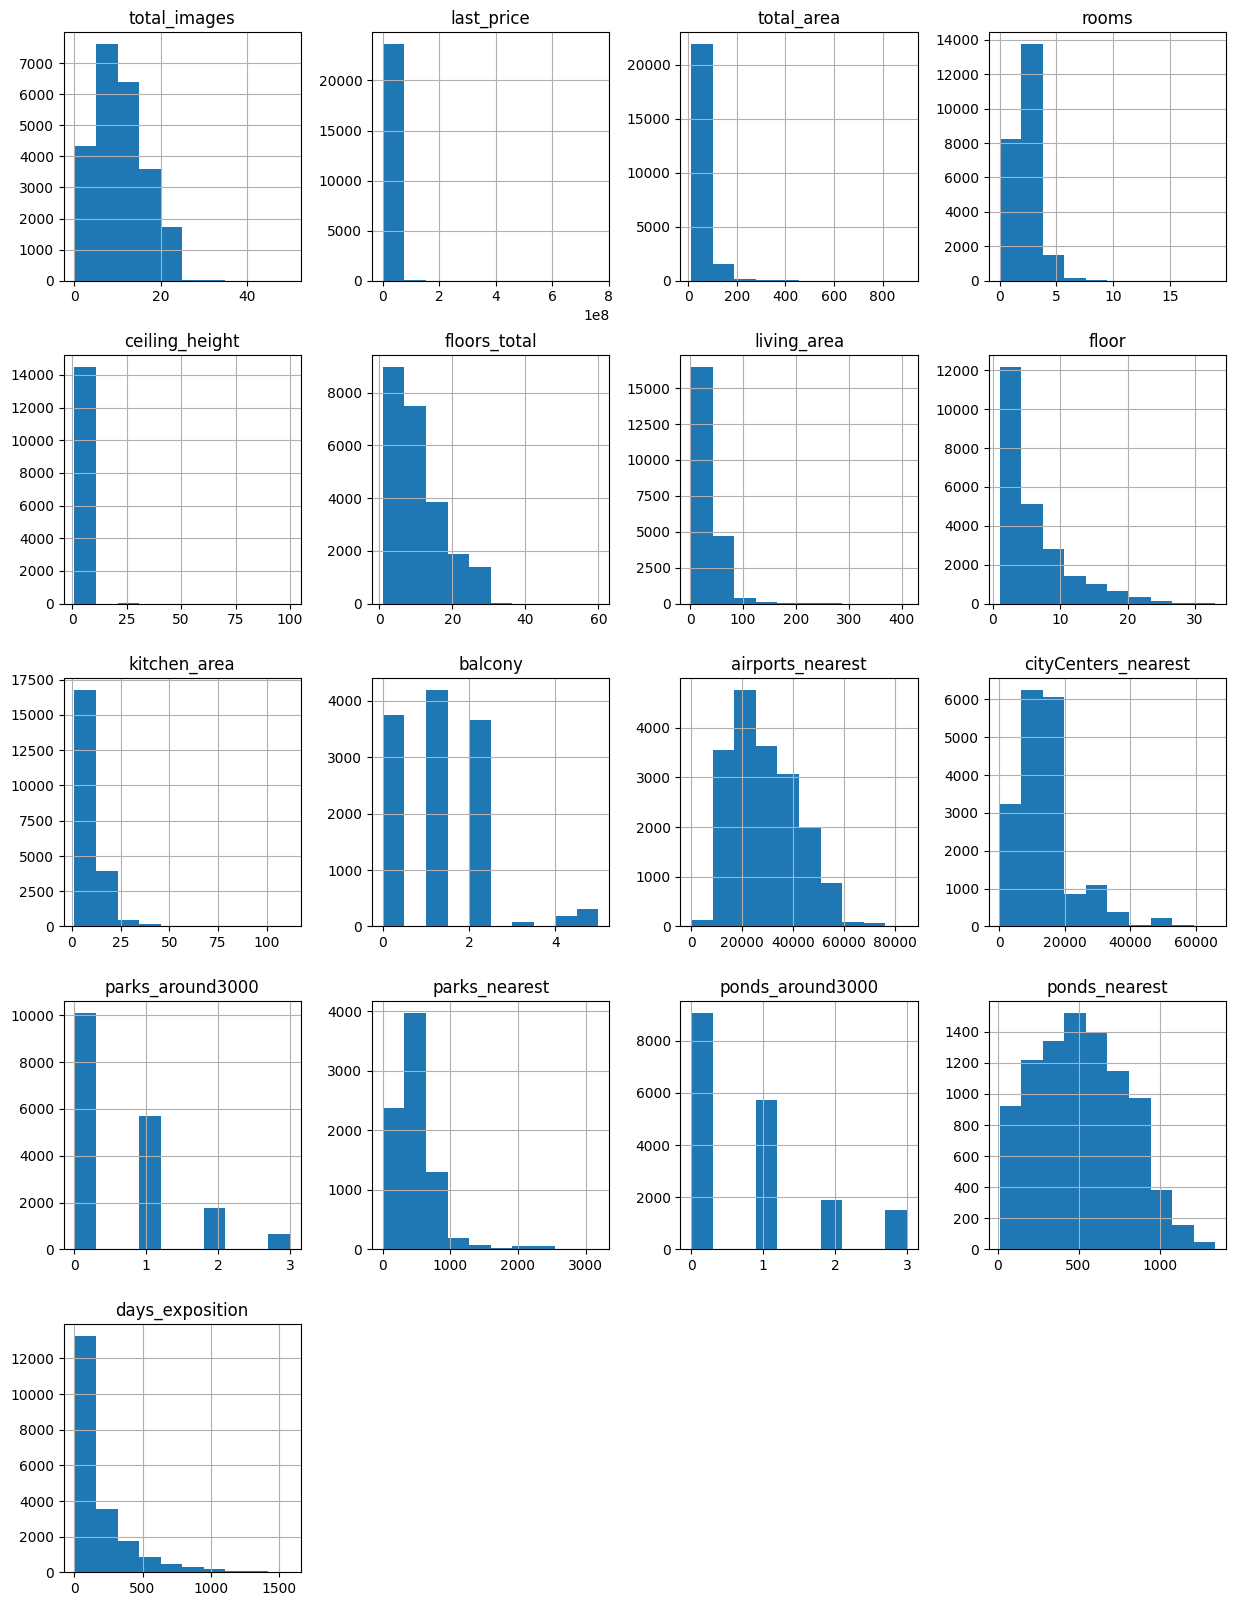

In [4]:
data.hist(figsize=(15, 20));

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Графики построено верно! 
</div>
															
<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Если после кода вызывающего график добавить ";", то мы избавимся от строчки над графиком)

	data.hist(figsize=(15, 20));
</div>

### Выполните предобработку данных

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Для понимания того, какие пропуски сильно влияют на цену рассмотрим корреляции.

In [6]:
data.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104473,0.115352,0.099288,-0.001987,0.010427,0.104780,0.031340,-0.029303,-0.024407,0.104756,0.121693,-0.002298,-0.047666,0.021120,-0.008347,-0.011553,-0.003034,-0.026657
last_price,0.104473,1.000000,0.653675,0.363343,0.085430,-0.006984,0.566492,0.026576,-0.025362,-0.008802,0.519869,0.029646,-0.026239,-0.206747,0.151058,-0.016414,0.159996,-0.084809,0.081146
total_area,0.115352,0.653675,1.000000,0.758344,0.095490,-0.075774,0.939537,-0.024754,-0.072653,-0.034885,0.609121,0.047937,-0.030753,-0.231446,0.164689,-0.021497,0.162346,-0.097969,0.149675
rooms,0.099288,0.363343,0.758344,1.000000,0.054457,-0.228215,0.845977,-0.150862,-0.147286,-0.087500,0.269945,0.017991,-0.061199,-0.184864,0.137257,-0.054549,0.092693,-0.057689,0.126961
ceiling_height,-0.001987,0.085430,0.095490,0.054457,1.000000,-0.028732,0.090650,-0.011798,0.001674,0.042777,0.087641,0.040523,-0.023947,-0.091689,0.065915,-0.019167,0.078209,-0.059090,0.019091
floors_total,0.010427,-0.006984,-0.075774,-0.228215,-0.028732,1.000000,-0.169311,0.678059,0.070151,0.050791,0.163944,0.194065,0.108288,0.019774,-0.252833,0.097527,-0.122735,0.038864,-0.052234
living_area,0.104780,0.566492,0.939537,0.845977,0.090650,-0.169311,1.000000,-0.097210,-0.056231,-0.033711,0.428674,0.018849,-0.057912,-0.231368,0.184453,-0.050167,0.148933,-0.081674,0.142454
floor,0.031340,0.026576,-0.024754,-0.150862,-0.011798,0.678059,-0.097210,1.000000,0.036940,0.035824,0.135531,0.168773,0.071597,0.009084,-0.163784,0.073045,-0.076312,0.024850,-0.039463
studio,-0.029303,-0.025362,-0.072653,-0.147286,0.001674,0.070151,-0.056231,0.036940,1.000000,-0.004235,NaN,0.031455,-0.021876,-0.007029,-0.030202,0.009134,0.000939,0.002606,-0.022476
open_plan,-0.024407,-0.008802,-0.034885,-0.087500,0.042777,0.050791,-0.033711,0.035824,-0.004235,1.000000,NaN,0.019491,-0.013583,-0.004204,-0.010077,0.010612,0.008455,-0.003328,-0.024112


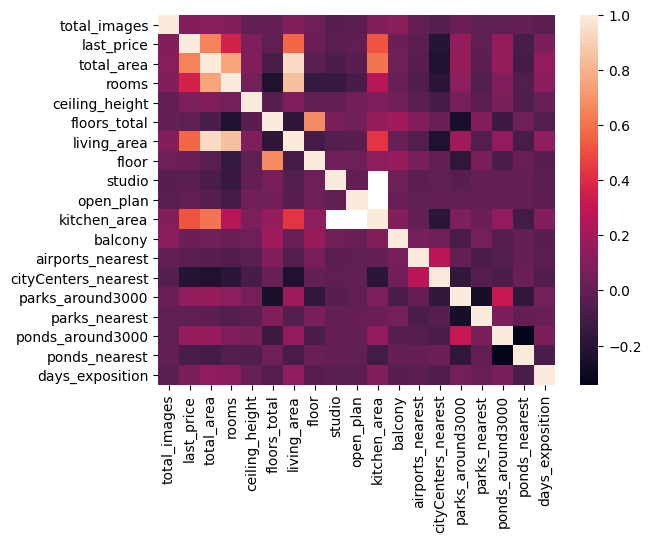

In [7]:
sb.heatmap(data.corr());

Примим решение по обработке пропусков для кажлого из соответствующих столбцов. Данные, в которых хранится информация о расстояниях содержащие пропуски не подлежат заполнению значениями т.к. невозможно подобрать алгоритм, учитывающий особенности расположения каждого объекта недвижимости. 

Начнём с атрибутов данных, которые незначительно влияют на цену.

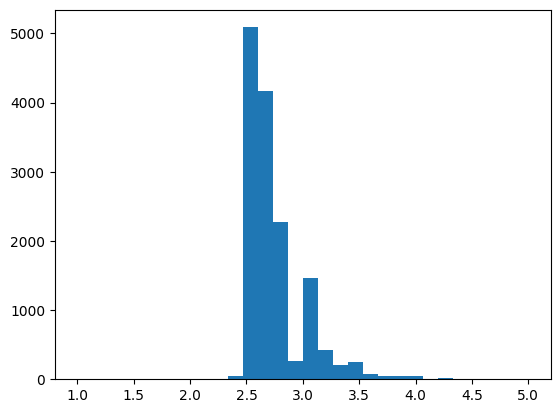

In [8]:
plt.hist(data["ceiling_height"], bins=30, range=(1, 5));

In [9]:
data["ceiling_height"].corr(data["last_price"])

0.085430309828426

Учитывая график распределения высоты потолков с длинным хвостом в сторону высоких потолков и относительно низкую корреляцию с ценой, заменим пропуски медианным значением как наиболее типичным без риска исказить целевой показатель предсказания.

In [10]:
data["ceiling_height"] = data["ceiling_height"].fillna(value=data["ceiling_height"].median())
data["ceiling_height"].isna().sum()

0

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Согласен с таким решением для столбца с высотой потолков, так как основная часть данных в этом столбце находится в небольшом диапазоне.
</div>

(array([2.500e+01, 3.830e+02, 6.680e+02, 6.988e+03, 9.140e+02, 5.920e+02,
        4.151e+03, 1.174e+03, 2.030e+02, 1.591e+03, 5.530e+02, 3.650e+02,
        2.209e+03, 5.050e+02, 3.390e+02, 4.290e+02, 2.860e+02, 3.520e+02,
        1.544e+03, 1.240e+02, 1.640e+02, 2.200e+01, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 2.400e+01, 4.000e+00, 0.000e+00, 0.000e+00]),
 array([ 0.        ,  1.33333333,  2.66666667,  4.        ,  5.33333333,
         6.66666667,  8.        ,  9.33333333, 10.66666667, 12.        ,
        13.33333333, 14.66666667, 16.        , 17.33333333, 18.66666667,
        20.        , 21.33333333, 22.66666667, 24.        , 25.33333333,
        26.66666667, 28.        , 29.33333333, 30.66666667, 32.        ,
        33.33333333, 34.66666667, 36.        , 37.33333333, 38.66666667,
        40.        ]),
 <BarContainer object of 30 artists>)

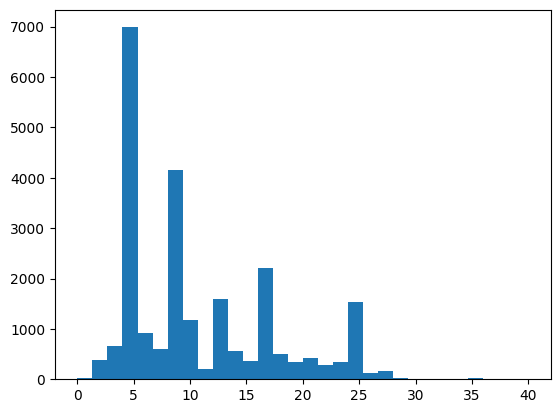

In [11]:
plt.hist(data["floors_total"], bins=30, range=(0, 40))

In [12]:
data["floors_total"].corr(data["last_price"])

-0.006983534007227376


я этажности здания с хвостами, несколькими локальными максимумами и относительно низкую корреляцию с ценой, заменим пропуски средним арифметическим значением чтобы не искажать дисперсию.

In [13]:
data["floors_total"] = data["floors_total"].fillna(value=data["floors_total"].mean())



data["floors_total"].isna().sum()

0

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Если мы заполняем таким способом, то нужно делать проверку, а не превышает ли этаж, на котором квартира общую этажность? Можно заменить на этаж квартиры либо оставить как есть
</div>

Рассмотрим пропуски в поле `is_apartment`. Их подозрительно много. Пропуски почти во всех записях.

In [14]:
data["is_apartment"].isna().sum()

20924

In [15]:
data["is_apartment"].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Т.к. апартаментов в присутствующих данных очень мало, предположим, что во всех записях пропуски обозначают, что недвижимость не является апартаментами.

In [16]:
data["is_apartment"] = data["is_apartment"].fillna(value=False)
data["is_apartment"].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>👌
</div>

Рассмотрим пропуски в поле `is_apartment`. Пропуски почти в половине записей.

In [17]:
data["balcony"].isna().sum()

11519

In [18]:
data["balcony"].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

Предположим, что в записях с пропусками нет балконов т.к. продавец замотивирован указывать преимущества в своём объявлений и пропуск может означать отсутствие.

In [19]:
data["balcony"] = data["balcony"].fillna(value=0)
data["balcony"].value_counts()

0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>👌
</div>

Рассмотрим пропуски в поле `locality_name`. Т.к. из названия поля не ясно, что значит эта строка, посмотрим на значения и их количество

In [20]:
data["locality_name"].isna().sum()

49

In [21]:
data["locality_name"].value_counts()

Санкт-Петербург                        15721
посёлок Мурино                           522
посёлок Шушары                           440
Всеволожск                               398
Пушкин                                   369
                                       ...  
деревня Каськово                           1
поселок городского типа Кондратьево        1
деревня Пчева                              1
поселок Перово                             1
поселок Коммунары                          1
Name: locality_name, Length: 364, dtype: int64

Поле означает название населённого пункта. Предположим, что в значениях этого поля могут быть явные и неявные дубликаты и проверим это позже. На данном этапе заполним пропуски строками "No locality" т.к. значение может быть в дальнейшем использовано для группировки по категории населённых пунктов.

In [22]:
data["locality_name"] = data["locality_name"].fillna(value="No locality")
data["locality_name"].isna().sum()

0

Поле `airports_nearest` не очень скоррелировано с прогнозируемым показателем, поэтому посмотрим на частотность встречаемых значений и примем решение исходя их неё.

In [23]:
data["airports_nearest"].isna().sum()

5542

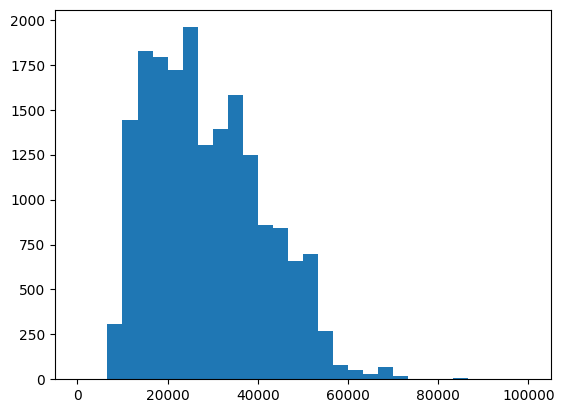

In [24]:
plt.hist(data["airports_nearest"], bins=30, range=(0, 100000));

Т.к. поле содержит инормацию о расположении, оставим пропуски.

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Пропуски в столбцах с картографическими данными лучше не трогать. Заполняя их таким образом, ты проставляешь одинаковые расстояния для разных квартир, хотя они могут быть расположены в разных частях города. Эти пропуски заполнять не нужно
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Оставил пропуски в данных о расположении.
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

Поле `ponds_around3000` содержит пропуски примерно в трети записей. Расссмотрим, какие значения в нём встречаются.

In [25]:
data["ponds_around3000"].value_counts()

0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64

Т.к. поле содержит инормацию о расположении, оставим пропуски.

Поле `ponds_nearest` содержит пропуски чуть менее чем в половине записей. Расссмотрим, как распределены существующие значения.

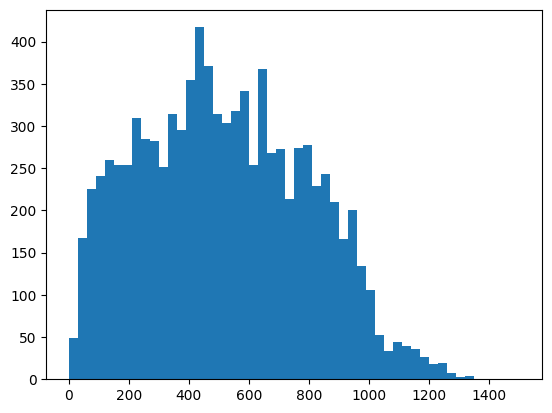

In [26]:
plt.hist(data["ponds_nearest"], bins=50, range=(0, 1500));

Т.к. поле содержит инормацию о расположении, оставим пропуски.

Поле `days_exposition`. Для начала оценим распределение значений.

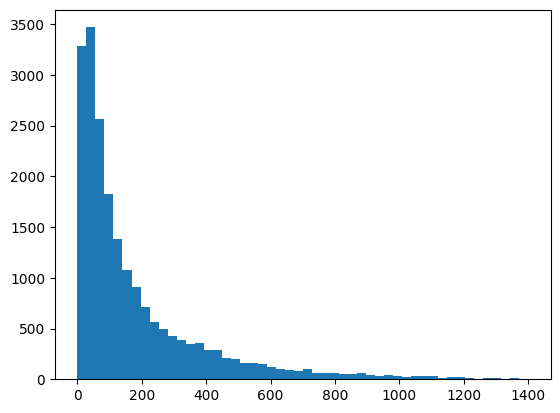

In [27]:
plt.hist(data["days_exposition"], bins=50, range=(0, 1400));

Т.к. пропусков относительно небольшое количество и их влияние на целевой показатель относительно низкое, оставим их, чтобы не искажать данные предположив, что отсутствие значения означает продолжающуюся на момент сбора данных продажу.

Для остальных атрибутов данных влияние на целевой показатель относительно велико, поэтому заменим пропуски сомоделировав исходное распределение методом Multiple Imputation.

In [28]:
selected_fields = data.select_dtypes(include=['float64', 'int64'])
selected_fields = selected_fields.loc[:, ~selected_fields.columns.isin(['airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition'])]
selected_fields.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_images    23699 non-null  int64  
 1   last_price      23699 non-null  float64
 2   total_area      23699 non-null  float64
 3   rooms           23699 non-null  int64  
 4   ceiling_height  23699 non-null  float64
 5   floors_total    23699 non-null  float64
 6   living_area     21796 non-null  float64
 7   floor           23699 non-null  int64  
 8   kitchen_area    21421 non-null  float64
 9   balcony         23699 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 1.8 MB


Рассчитаем пропущенные значения пользуясь доступной информацией из датасета методом Multiple Imputation с целью сохранить связи в данных и минимально исказаить распределение характеристик с большим влиянием на цену.

In [29]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
imp = IterativeImputer(estimator=regressor, missing_values=np.nan, max_iter=10, verbose=2, imputation_order='roman')
filled_data = pd.DataFrame(imp.fit_transform(selected_fields), columns=selected_fields.columns)

for column in filled_data.columns:
    data[column] = filled_data[column]

data.isna().sum()

[IterativeImputer] Completing matrix with shape (23699, 10)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.07
[IterativeImputer] Change: 304.83660614334786, scaled tolerance: 763000.0 
[IterativeImputer] Early stopping criterion reached.


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>days_exposition - если тут пропуск, то значит квартира не продана. Эти пропуски заполнять не нужно
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Оставил пропуски в поле `days_exposition` как индикатор незавершённости продажи на момент сбора данных.
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

В поле `parks_nearest` больше половины записей содержат пропуски. Рассмотрим, какие значения встречаются в этом атрибуте данных.

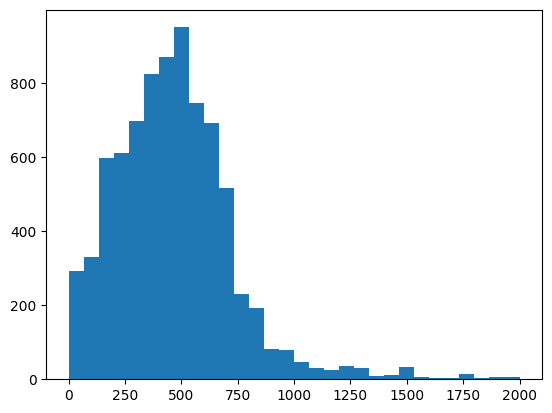

In [30]:
plt.hist(data["parks_nearest"], bins=30, range=(0, 2000));

Т.к. поле содержит инормацию о расположении, оставим пропуски.

Убедимся, что всё пропуски заполнены.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Не забывай, что не всегда стоит делать замену, ради замены. Очень важно обоснование. Иногда пропуски можно удалить (если их мало), либо вообще не трогать, если у нас нет возможности подобрать аргументированный способ замены
</div>

In [31]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Приведём данные в соответствующие хранимым значениям типы Pandas.

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  float64
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  float64
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  float64
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

In [33]:
data = data.astype({
        'total_images' : 'int64',
        'last_price' : 'int64',
        'first_day_exposition': 'datetime64',
        'rooms': 'int64',
        'floors_total' : 'int64',
        'floor' : 'int64',
        'is_apartment' : 'bool',
        'balcony' : 'int64',
        'airports_nearest' : 'int64',
        'cityCenters_nearest' : 'int64',
        'parks_around3000' : 'int64',
        'parks_nearest' : 'int64',
        'ponds_around3000' : 'int64',
        'ponds_nearest' : 'int64',
        'days_exposition' : 'int64'
    }, errors='ignore')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Изменение типов данных проведено верно. Можно ещё заменить тип данных с float64 на float32 для экономии памяти.
</div>

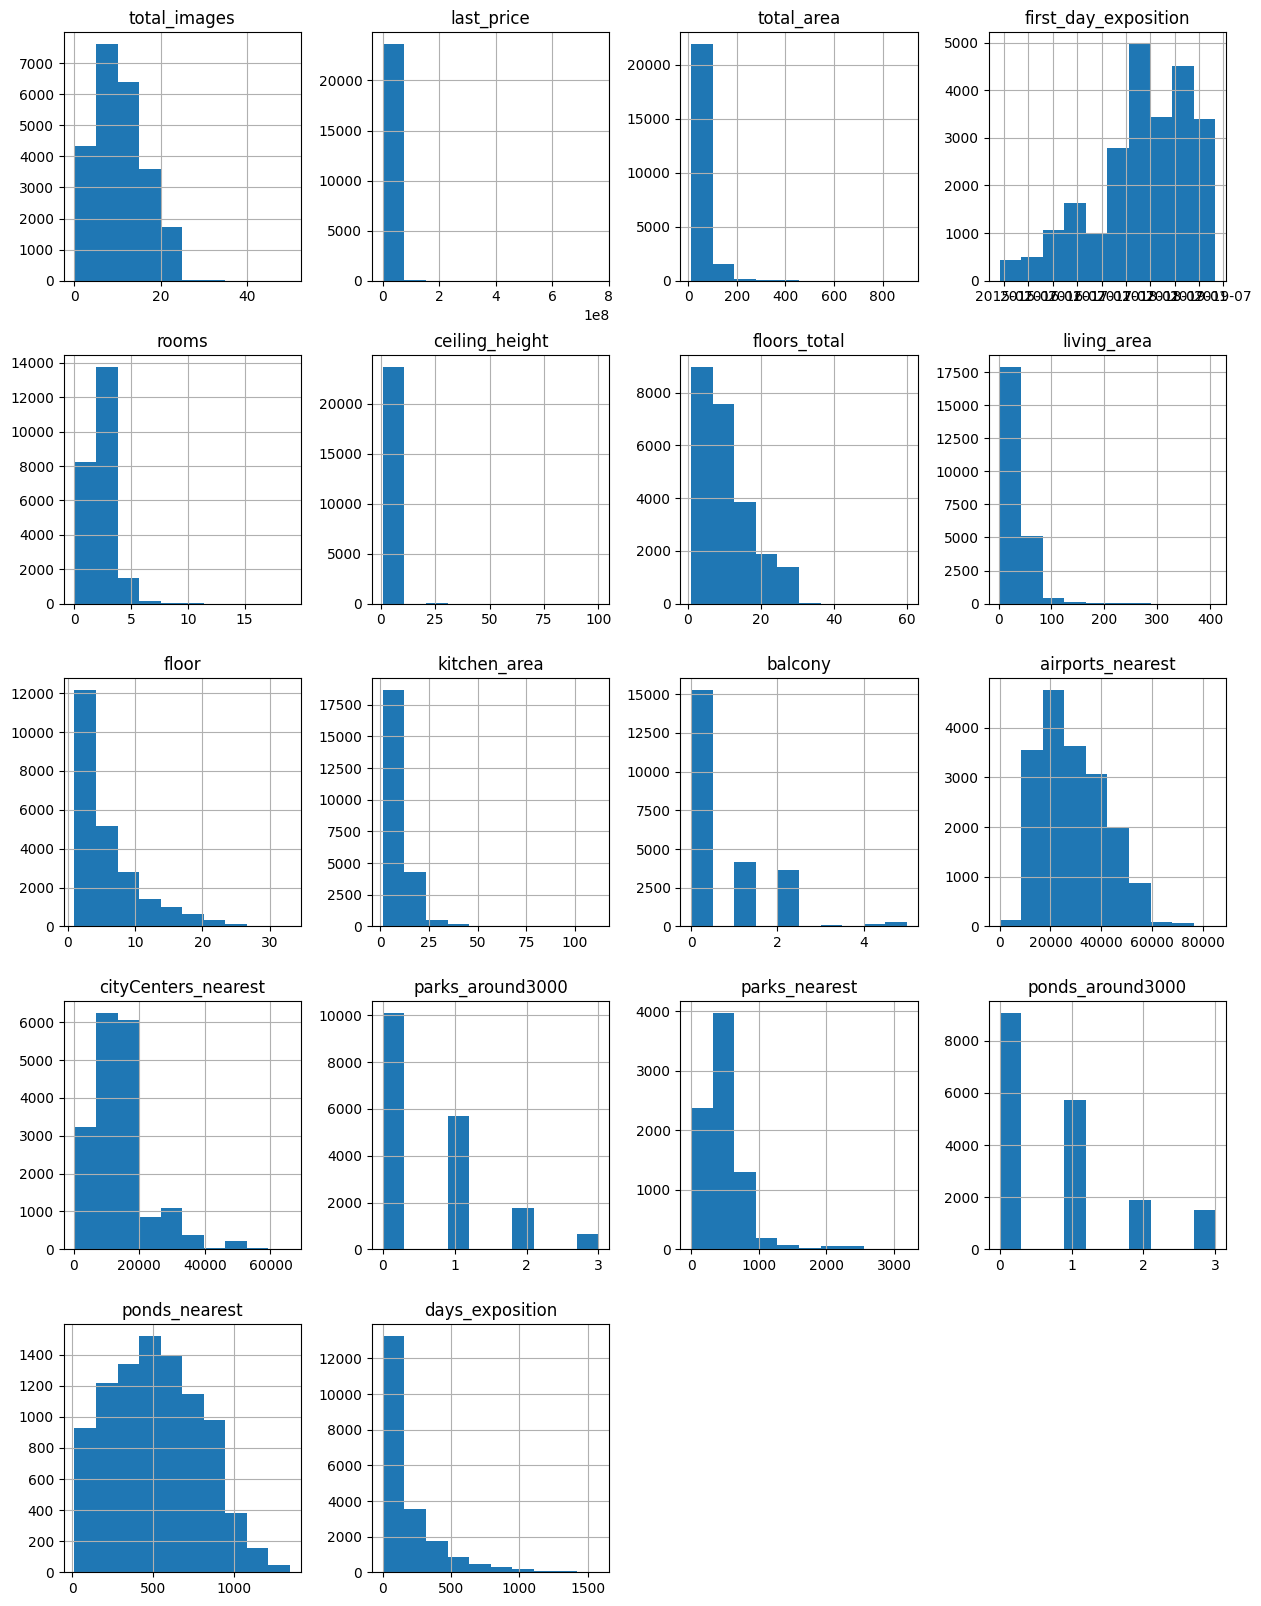

In [34]:
data.hist(figsize=(15, 20));

Изучим количество уникальных названий населённых пунктов.

In [35]:
unique_names = pd.Series(data["locality_name"].unique())
unique_names

0                Санкт-Петербург
1                 посёлок Шушары
2      городской посёлок Янино-1
3              посёлок Парголово
4                 посёлок Мурино
                 ...            
360               деревня Нижняя
361    коттеджный посёлок Лесное
362            деревня Тихковицы
363       деревня Борисова Грива
364         посёлок Дзержинского
Length: 365, dtype: object

Проверим наличие явных дубликатов.

In [36]:
unique_names.duplicated().sum()

0

Воспользуемся расстоянием Левенштайна между строками чтобы найти неявные дубликаты т.к. уникальных значений достаточно много чтобы обрабатывать их вручную и достаочно мало, чтобы алгоритм сработал за относительно непродолжительное время. 

In [37]:
def print_duplicates(strings, dist):
    duplicates_count = 0

    for i in range(0, len(strings)):
        for j in range(i, len(strings)):
            if i == j: continue

            if distance(strings[i], strings[j]) <= dist:
                print(strings[i], '\t', strings[j])
                duplicates_count += 1
            
    print(f"Duplicates count: {duplicates_count}")

print_duplicates(unique_names, 1)

городской посёлок Янино-1 	 городской поселок Янино-1
посёлок Мурино 	 поселок Мурино
поселок городского типа Красный Бор 	 посёлок городского типа Красный Бор
посёлок городского типа Лебяжье 	 поселок городского типа Лебяжье
поселок городского типа Кузьмоловский 	 посёлок городского типа Кузьмоловский
посёлок Аннино 	 поселок Аннино
посёлок Новый Свет 	 поселок Новый Свет
деревня Кальтино 	 деревня Калитино
посёлок Бугры 	 поселок Бугры
поселок городского типа Рощино 	 посёлок городского типа Рощино
посёлок Победа 	 поселок Победа
поселок Терволово 	 посёлок Терволово
посёлок Петровское 	 поселок Петровское
посёлок городского типа Токсово 	 поселок городского типа Токсово
посёлок городского типа Вырица 	 поселок городского типа Вырица
посёлок Тельмана 	 поселок Тельмана
поселок городского типа имени Свердлова 	 посёлок городского типа имени Свердлова
посёлок Поляны 	 поселок Поляны
посёлок Мичуринское 	 поселок Мичуринское
поселок Ильичёво 	 посёлок Ильичёво
посёлок Гаврилово 	 посело

Заменим везде букву `ё` на `е`.

In [38]:
data["locality_name"] = data["locality_name"].str.replace('ё','е')
unique_names = pd.Series(data["locality_name"].unique())
print_duplicates(unique_names, 1)

деревня Кальтино 	 деревня Калитино
деревня Курковицы 	 деревня Куровицы
Duplicates count: 2


Проанализировав на Яндекс.Картах эти 2 сочетания приходим к выводу, что это разные населённые пункты. Далее найдём сочетания с расстоянием Левенштайна равным 2.

In [39]:
print_duplicates(unique_names, 2)

поселок Парголово 	 поселок Гарболово
поселок Мурино 	 поселок Сумино
поселок городского типа Сиверский 	 поселок городского типа Советский
деревня Кальтино 	 деревня Калитино
поселок Щеглово 	 поселок Углово
поселок Саперный 	 поселок Саперное
поселок Семрино 	 поселок Сумино
деревня Тарасово 	 деревня Торосово
деревня Курковицы 	 деревня Куровицы
деревня Рапполово 	 деревня Лупполово
Duplicates count: 10


Все сочетания выглядят как уникальные населённые пункты. На всякий случай проверим сочетания с расстоянием Левенштайна в 3.

In [40]:
print_duplicates(unique_names, 3)

поселок Шушары 	 поселок Бугры
поселок Парголово 	 поселок Терволово
поселок Парголово 	 поселок Гарболово
поселок Мурино 	 поселок Аннино
поселок Мурино 	 поселок Репино
поселок Мурино 	 поселок Семрино
поселок Мурино 	 поселок Сумино
деревня Кудрово 	 деревня Реброво
Выборг 	 Высоцк
поселок городского типа Сиверский 	 поселок городского типа Советский
деревня Пикколово 	 деревня Лесколово
деревня Пикколово 	 деревня Мистолово
Волхов 	 Волосово
Приозерск 	 Приморск
деревня Куттузи 	 деревня Колтуши
поселок Аннино 	 поселок Репино
поселок Аннино 	 поселок Сумино
поселок Плодовое 	 поселок Плоское
деревня Лесколово 	 деревня Лаголово
деревня Лесколово 	 деревня Мистолово
деревня Лесколово 	 деревня Лупполово
село Путилово 	 село Павлово
деревня Оржицы 	 деревня Парицы
деревня Кальтино 	 деревня Калитино
деревня Нурма 	 деревня Пижма
поселок Терволово 	 поселок Гарболово
деревня Лаголово 	 деревня Гарболово
деревня Лаголово 	 деревня Лампово
деревня Лаголово 	 деревня Щеглово
деревня Лаг

Делаем вывод, что дубликатов в названиях населённых пунктов больше нет.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Супер! Здесь всё верно)
</div>

### Добавьте в таблицу новые столбцы

Добавим поле с ценой за квадратный метр.

In [41]:
data["square_price"] = (data["last_price"] / data["total_area"]).round(2)
data["square_price"]

0        120370.37
1         82920.79
2         92785.71
3        408176.10
4        100000.00
           ...    
23694     72490.85
23695     52542.37
23696     44091.71
23697    149511.40
23698     41795.67
Name: square_price, Length: 23699, dtype: float64

Добавим номер дня недели.

In [42]:
data["day_index"] = data["first_day_exposition"].dt.weekday
data["day_index"]

0        3
1        1
2        3
3        4
4        1
        ..
23694    1
23695    0
23696    6
23697    1
23698    4
Name: day_index, Length: 23699, dtype: int64

Добавим номер месяца в году.

In [43]:
data["month_index"] = data["first_day_exposition"].dt.month
data["month_index"]

0         3
1        12
2         8
3         7
4         6
         ..
23694     3
23695     1
23696     2
23697     3
23698     7
Name: month_index, Length: 23699, dtype: int64

Добавим номер года.

In [44]:
data["year_index"] = data["first_day_exposition"].dt.year
data["year_index"]

0        2019
1        2018
2        2015
3        2015
4        2018
         ... 
23694    2017
23695    2018
23696    2018
23697    2017
23698    2017
Name: year_index, Length: 23699, dtype: int64

Добавим тип этажа квартиры: «первый», «последний», «другой».

In [45]:
def floor_type(df):
    if df["floor"] == 1:
        return "первый"
    elif df["floor"] == df["floors_total"]:
        return "последний"
    else:
        return "другой"

data["floor_type"] = data.apply(floor_type, axis=1)
data["floor_type"].nunique()

3

Добавим расстояние до центра города в километрах.

In [46]:
data["city_center_km"] = (data["cityCenters_nearest"] / 1000).round().astype("Int64")
data["city_center_km"]

0          16
1          19
2          14
3           7
4           8
         ... 
23694       4
23695    <NA>
23696    <NA>
23697      10
23698    <NA>
Name: city_center_km, Length: 23699, dtype: Int64

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Все необходимые колонки добавлены. Идём дальше)
</div>

### Проведите исследовательский анализ данных

Перед отсечением выбросов сохраним количество записей в наборе данных чтобы получить в конце информацию о потерях в количестве записей после чистки.

In [47]:
rows_before_purge = len(data)

Исследуем гистограмму распреденения площади недвижимости `total_area`.

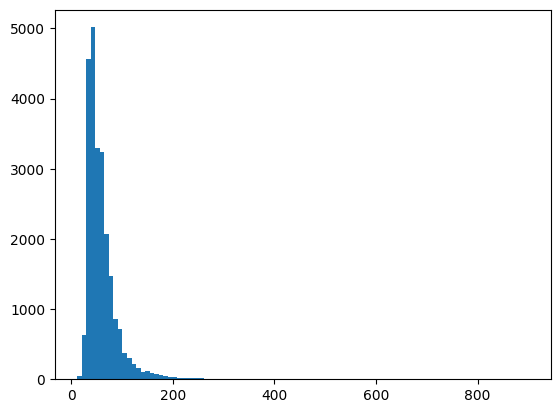

In [48]:
plt.hist(data["total_area"], bins=100);

Частотность недвижимости с большими значениями площади низкая. Т.к. предыдущий график не показывает явно выбросы, рассмотрим его же в логарифмическом масштабе.

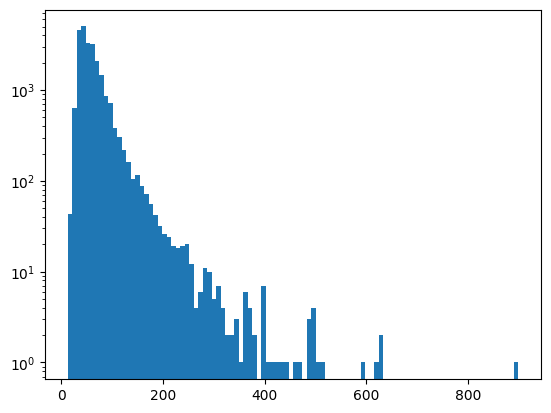

In [49]:
plt.hist(data["total_area"], bins=100, log=True);

Исходя из непрерывности значений площади делаем вывод, что большие значения площади больше 500 метров можно считать выбросами. Посчитаем их количество и выбросим из набора данных если их более чем на два порядка меньше, чем количества записей.

In [50]:
print(f"Выбросов по общей площади в процентах: {100 * len(data[data['total_area'] > 400]['total_area']) / len(data):.2f}%")

Выбросов по общей площади в процентах: 0.10%


In [51]:
data = data[data['total_area'] <= 400]

Повторим предыдущий процесс для жилой площади `living_area`.

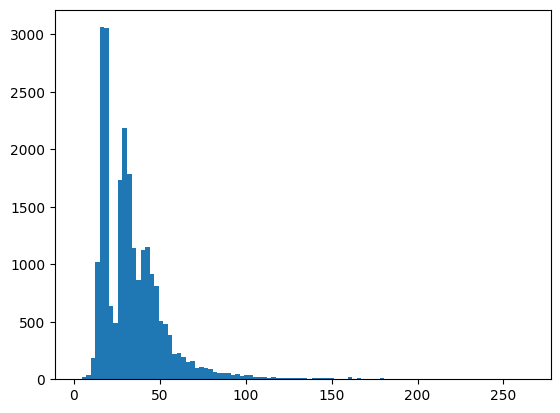

In [52]:
plt.hist(data["living_area"], bins=100);

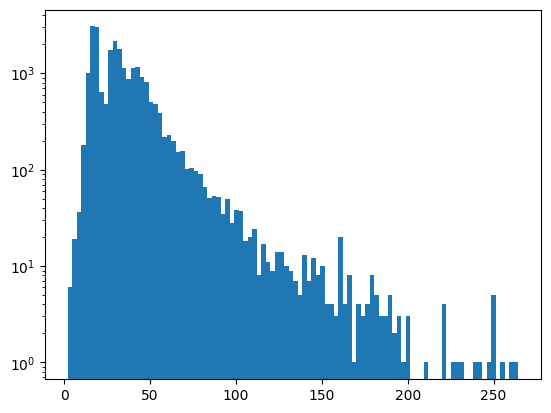

In [53]:
plt.hist(data["living_area"], bins=100, log=True);

Учитывая распределения в обычном и логарифмическом масштабе, предположим, что выбросами можно считать значения большие 175 метров. Проверим это посчитав, сколько таких значений в выборке.

In [54]:
print(f"Выбросов по жилой площади в процентах: {100 * len(data[data['living_area'] > 175]['living_area']) / len(data):.2f}%")

Выбросов по жилой площади в процентах: 0.24%


In [55]:
data = data[data['living_area'] <= 175]

Повторим предыдущий процесс для кухонной площади `kitchen_area`.

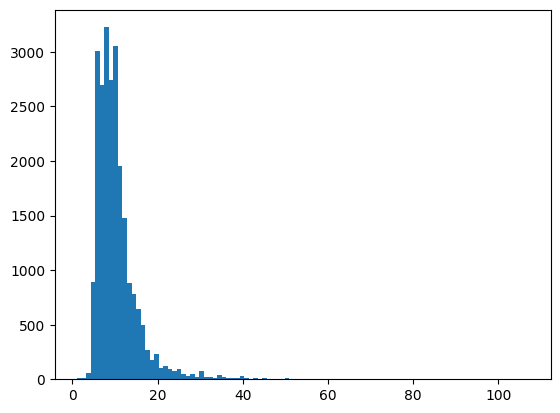

In [56]:
plt.hist(data["kitchen_area"], bins=100);

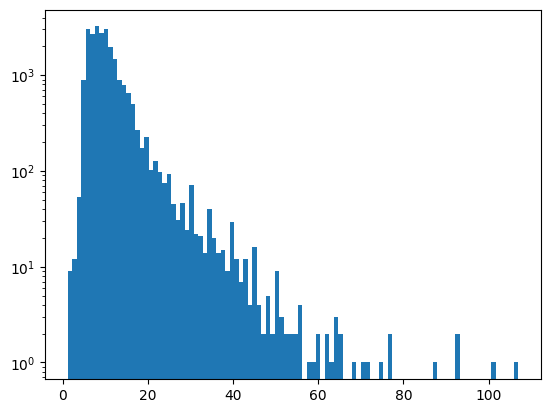

In [57]:
plt.hist(data["kitchen_area"], bins=100, log=True);

Учитывая распределения в обычном и логарифмическом масштабе, предположим, что выбросами можно считать значения большие 50 метров. Проверим это посчитав, сколько таких значений в выборке.

In [58]:
print(f"Выбросов по площади кухни в процентах: {100 * len(data[data['kitchen_area'] > 50]['kitchen_area']) / len(data):.2f}%")

Выбросов по площади кухни в процентах: 0.16%


In [59]:
data = data[data['kitchen_area'] <= 50]

Рассмотрим рассперделдение цен на недвижимость `last_price`.

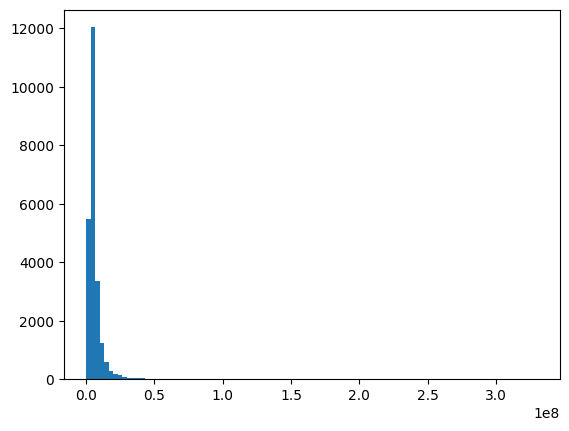

In [60]:
plt.hist(data["last_price"], bins=100);

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Тут можно разделить все значения в столбце last_price на 1 млн, чтобы они пришли в более понятный вид)
</div>

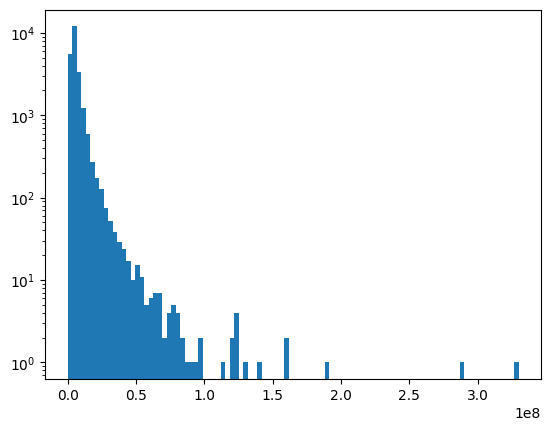

In [61]:
plt.hist(data["last_price"], bins=100, log=True);

Предположим по обоим графикам распределения, что цены более 30 миллионов встречаются редко. Проверим это предположение.

In [62]:
print(f"Выбросов по цене недвижимости в процентах: {100 * len(data[data['last_price'] > 30_000_000]['last_price']) / len(data):.2f}%")

Выбросов по цене недвижимости в процентах: 1.00%


Т.к. цена является целевым показателем, не спешим принимать решения и расмотрим boxplot для этого атрибута данных.

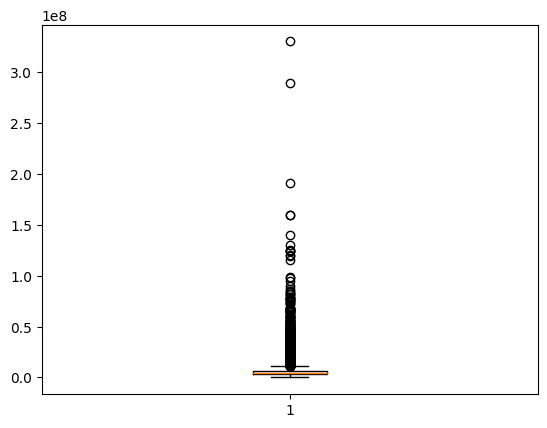

In [63]:
plt.boxplot(data['last_price']);

Явно видно, что значения больше 150_000_000 можно считать выбросами. Обрежим выбросы более 150_000_000 по цене и посмотрим на boxplot ещё раз.

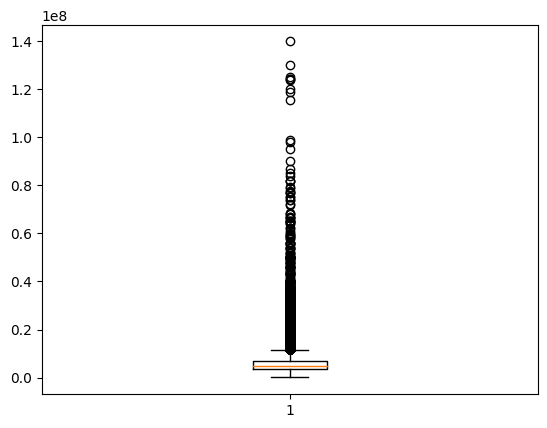

In [64]:
plt.boxplot(data[data['last_price'] <= 150_000_000]['last_price']);

На этом графике видно явно, что реже встречаются цены более 100_000_000. Посмотрим, сколько таких объявлений.

In [65]:
print(f"Выбросов по цене недвижимости в процентах: {100 * len(data[data['last_price'] > 100_000_000]['last_price']) / len(data):.2f}%")

Выбросов по цене недвижимости в процентах: 0.06%


Остановимся на том, что выбросами будем считать цены большие чем 100_000_000 и удалим такие значения из выорки.

In [66]:
data = data[data['last_price'] <= 100_000_000]

Рассмотрим рассперделдение объявлений по количеству комнат `rooms`.

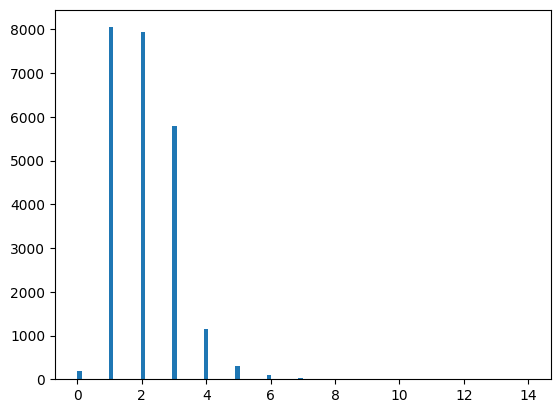

In [67]:
plt.hist(data["rooms"], bins=100);

На графике явно видно, что относительно редко встречаются квартиры более чем с шестью комнатами. Проверим, сколько таких квартир в объявлениях.

In [68]:
print(f"Выбросы по количеству комнат в процентах: {100 * len(data[data['rooms'] > 6]['rooms']) / len(data):.2f}%")

Выбросы по количеству комнат в процентах: 0.22%


Таких значений мало, будем считать все объявления с количеством комнат более 6 выбросами и исключим их.

In [69]:
data = data[data['rooms'] <= 6]

Рассмотрим рассперделдение высоты потолков `ceiling_height`.

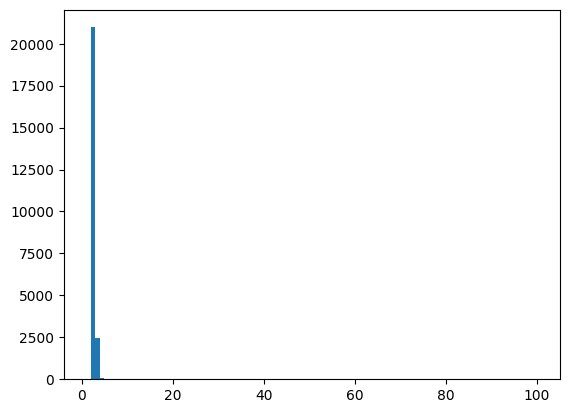

In [70]:
plt.hist(data["ceiling_height"], bins=100);

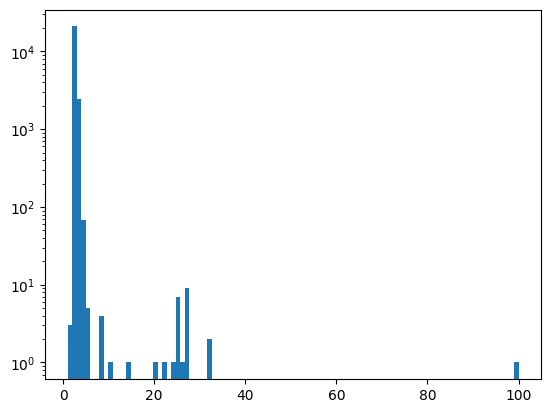

In [71]:
plt.hist(data["ceiling_height"], bins=100, log=True);

Значений не очень много, поэтому изучим их частотность аналитически.

In [72]:
data["ceiling_height"].value_counts()

2.65     9814
2.50     3514
2.60     1646
2.70     1571
3.00     1096
         ... 
14.00       1
4.45        1
3.59        1
5.20        1
22.60       1
Name: ceiling_height, Length: 176, dtype: int64

Всё же значений достаточно много, что не было отражено на первом графике. Рассмотрим boxplot чтобы лучше понять распеределение.

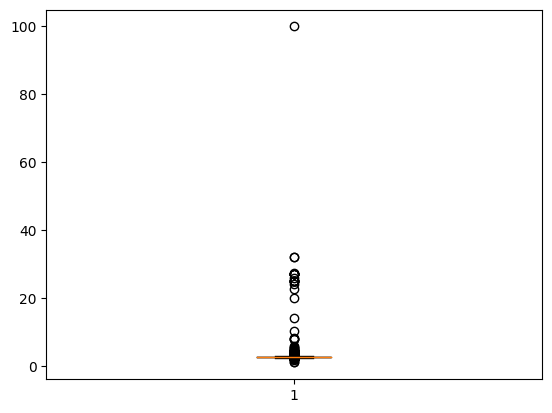

In [73]:
plt.boxplot(data["ceiling_height"]);

Предположим, что значения от 10 до 40 метров записаны как целочисленные, но их размерность в 10 раз ниже и фактически это не целочисленные значения. Преобразуем эти значения и удалим выброс в районе 100 метров.

In [74]:
data = data[data['ceiling_height'] <= 40]
data = data.reset_index(drop=True)

In [75]:
height_subset = data[data["ceiling_height"] > 10]
data["ceiling_height"] = pd.concat([
            data.iloc[data.index.difference(height_subset.index)]["ceiling_height"], 
            height_subset["ceiling_height"] / 10
        ])
data = data[data["ceiling_height"].notna()]
data = data.reset_index(drop=True)

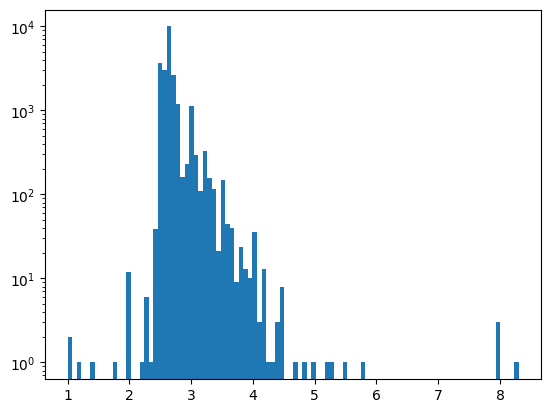

In [76]:
plt.hist(data["ceiling_height"], bins=100, log=True);

Теперь значения высоты потолков выглядят более правдоподобно, если допустить наличие коммерческой недвижимости в выборке.

Рассмотрим рассперделдение типов этажей `floor_type`.

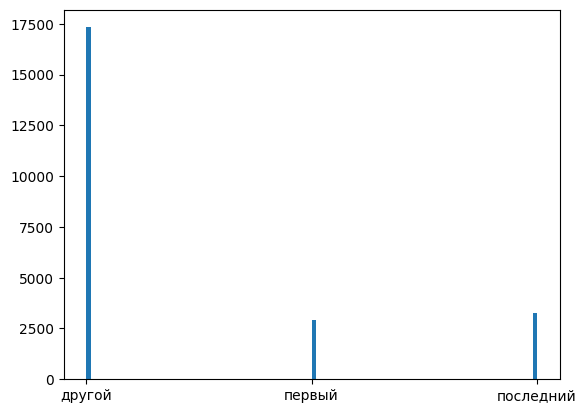

In [77]:
plt.hist(data["floor_type"], bins=100);

Большинство квартир ожидаемо находятся между первым и последним этажами.

Рассмотрим рассперделдение высоты зданий, в которых продаётся недвижимость `floors_total`.

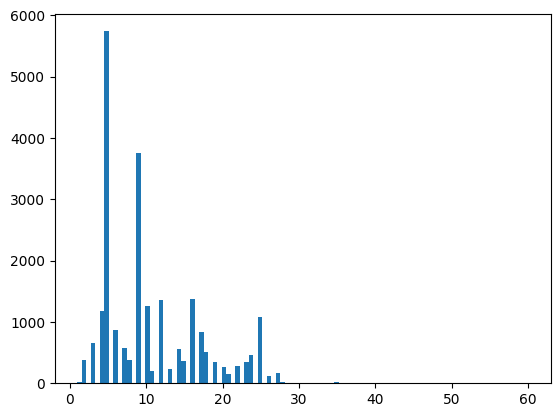

In [78]:
plt.hist(data["floors_total"], bins=100);

Заметим, что больше всего квартир в домах ниже 10 этажей, но много и домов выше в объявленях.

Рассмотрим рассперделдение расстояний до центра города `cityCenters_nearest`.

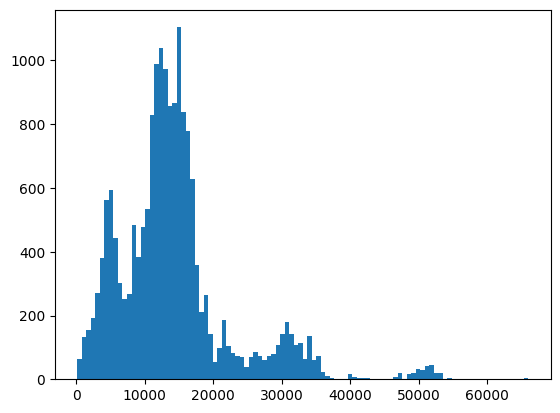

In [79]:
plt.hist(data["cityCenters_nearest"], bins=100);

Большинство недвижимости продаётся примерно в 15 киломах от центра города. При этом есть малая часть объявлений, расположенных на расстоянии около 50 км от центра. Учитывая наличие различных населённых пунктов в выборке и единственный центр города - центр Санкт-Петербугра, делаем вывод, что это не выбросы, а особенность данных.

Рассмотрим рассперделдение до ближайшего парка `parks_nearest`.

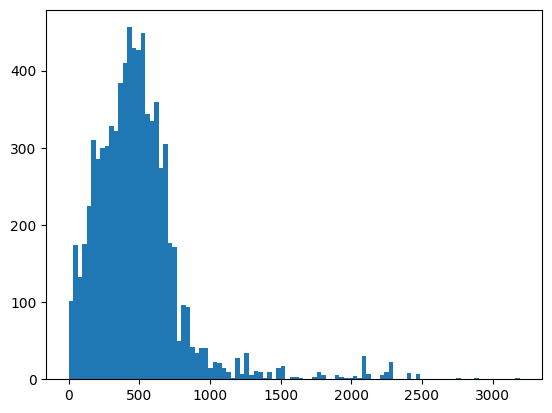

In [80]:
plt.hist(data["parks_nearest"], bins=100);

Распределение имеет длинных хвост схожий с наличием выбросов после 1500 метров. Проверим, какая часть данных сильно выделяется.

In [81]:
print(f"Выбросы по расстоянию до парка в процентах: {100 * len(data[data['parks_nearest'] > 1500]['parks_nearest']) / len(data):.2f}%")

Выбросы по расстоянию до парка в процентах: 0.73%


Учитывая количество значений расстояния до парка более 1.5 километров будем считать подобные расстояния выбросами и избавимся от них.

In [82]:
data = data[data['parks_nearest'] <= 1500]

Проанализируем, насколько много данных потеряно после отсечения выбросов в основных атрибутах выборки.

In [83]:
print(f"Процент утраченных после чистки записей: {100 - 100 * len(data) / rows_before_purge:.2f}%")

Процент утраченных после чистки записей: 67.20%


Количество потерь невелико, а качество данных улучшилось засчёт устранения выбросов.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Ты корректно подбираешь основные диапазоны, а также верно читаешь графики! Диапазоны для аномальных значений подобраны и удалены тоже верно!
</div>

Изучим скорость продажи недвижимости.

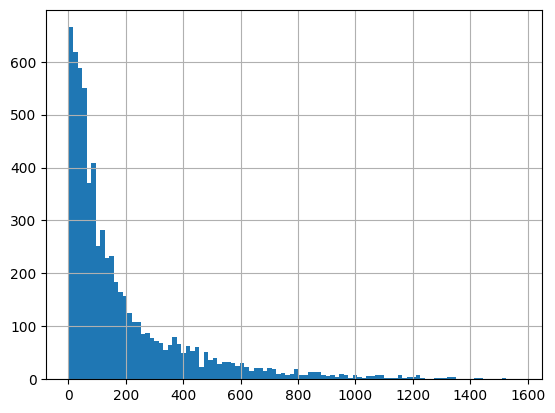

In [84]:
data["days_exposition"].hist(bins=100);

Напоминает распределение Пуассона. Проанализируем описательную статистику: в частности среднее и медиану.

In [85]:
data["days_exposition"].describe()

count    6678.000000
mean      191.806379
std       230.911072
min         1.000000
25%        45.000000
50%       103.500000
75%       245.000000
max      1572.000000
Name: days_exposition, dtype: float64

Делаем вывод, что "обычное" время ожидания продажи после размещения объявления это около 3 месяцев. Быстрой продажей можно считать подажи быстрее 2 месяцев. При этом в редких случаях время ожидания доходит и до нескольких лет.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Если интересно, то можно посмотреть на диапазон от 0 до 100 дней. Там есть пики, которым можно найти очень логичное объяснение</div>
</div>

Рассмотрим подробнее, как распределены значения от 0 до 100 дней.

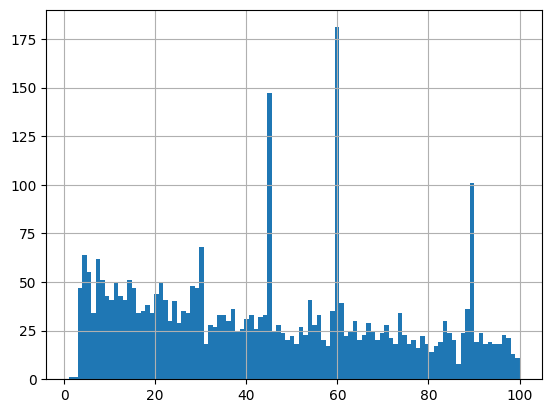

In [86]:
data[data["days_exposition"] <= 100]["days_exposition"].hist(bins=100);

Наблюдаем явные пики на 45 и 60 днях соответственно. Наибольший пик чере 1.5 месяца, вероятно, связан с обновлением статуса на платформе публицакации. Можно предположить, что в бесплатном тарифе этой платформы возможно поднятие объявления через 1.5 месяца.

Изучим влияние основных, на наш взгляд, характеристик, определяющих стоимость на неё же.

<AxesSubplot:>

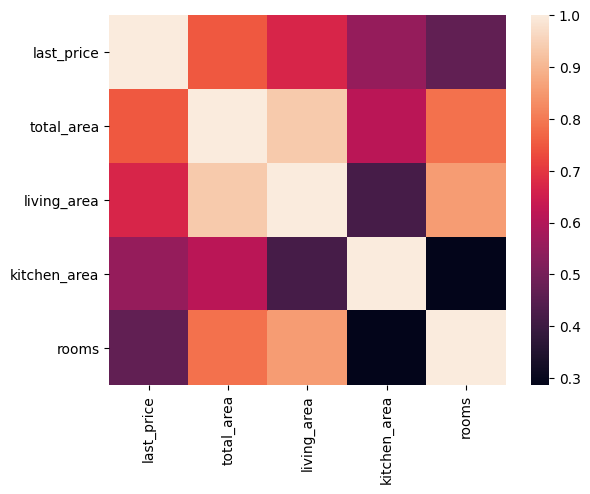

In [87]:
features_subset = data[["last_price", "total_area", "living_area", "kitchen_area", "rooms"]]
sb.heatmap(features_subset.corr())

И рассмотрим влияние на цену этих атрибутов данных аналитически, отсортировав корреляции по убыванию.

In [88]:
features_subset.corr().sort_values(by="last_price", ascending=False)["last_price"]

last_price      1.000000
total_area      0.750389
living_area     0.669193
kitchen_area    0.553812
rooms           0.466518
Name: last_price, dtype: float64

Для категориальных параметров построим гистограммы.

Начнём с этажей.

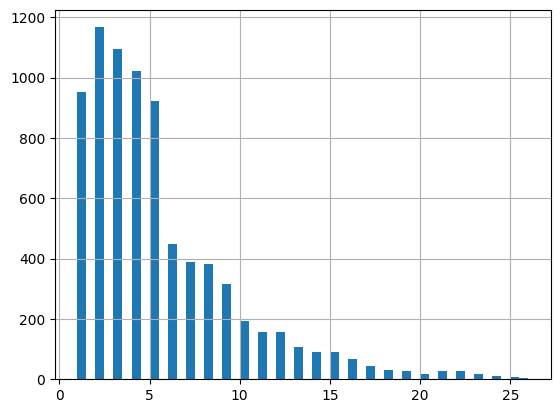

In [89]:
data["floor"].hist(bins=50);

Для более подробного анализа построим столбчатую диаграмму по типам этажей к медианной цене продажи.

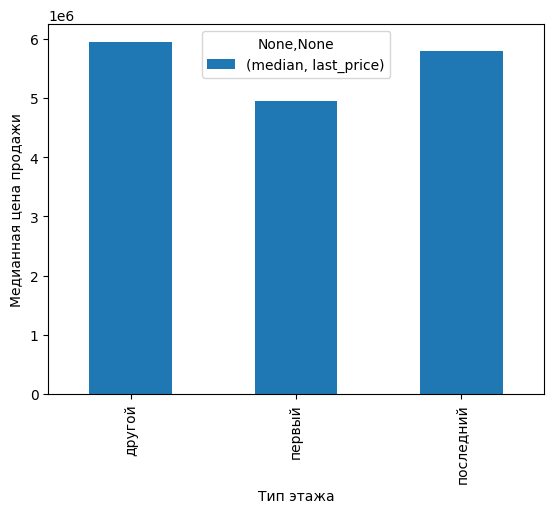

In [90]:
data.pivot_table(index="floor_type", values="last_price", aggfunc=["median"]).plot.bar(xlabel="Тип этажа", ylabel="Медианная цена продажи");

Видим, что больше всего квартир продаётся на 2 этаже. Также заметно, что большинство недвижимости продаётся в пятиэтажных зданиях и что на первом этаже продажи происходят по меньшей цене, чем на последнем.

Рассмотрим категориальные данные о времени продажи.

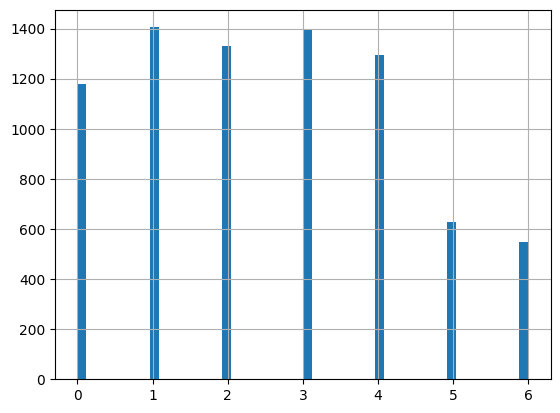

In [91]:
data["day_index"].hist(bins=50);

Для более подробного анализа построим столбчатую диаграмму по дням недели к цене продажи.

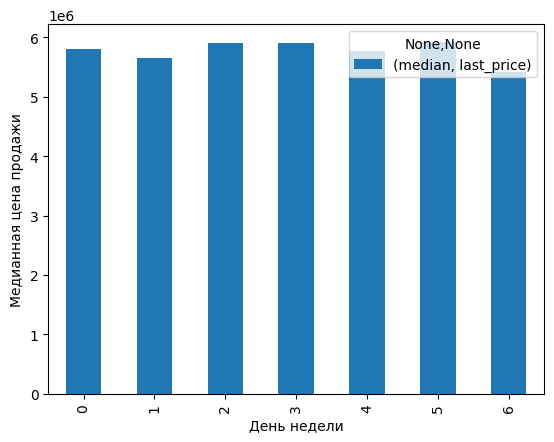

In [92]:
data.pivot_table(index="day_index", values="last_price", aggfunc=["median"]).plot.bar(xlabel="День недели", ylabel="Медианная цена продажи");

Недвидимость активнее всего продают в рабочие дни в середине недели. Цена продажи мало зависит от дня недели, в который подали объявление.

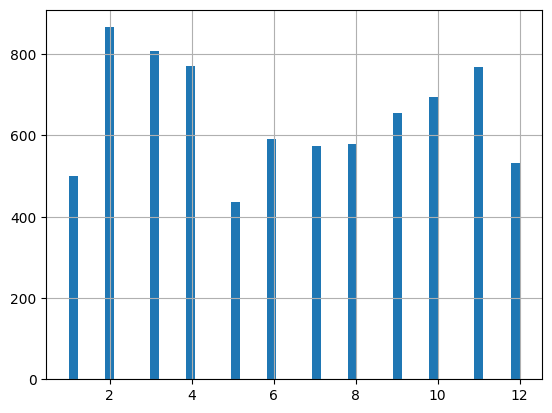

In [93]:
data["month_index"].hist(bins=50);

Для более подробного анализа построим столбчатую диаграмму по месяцам к цене продажи.

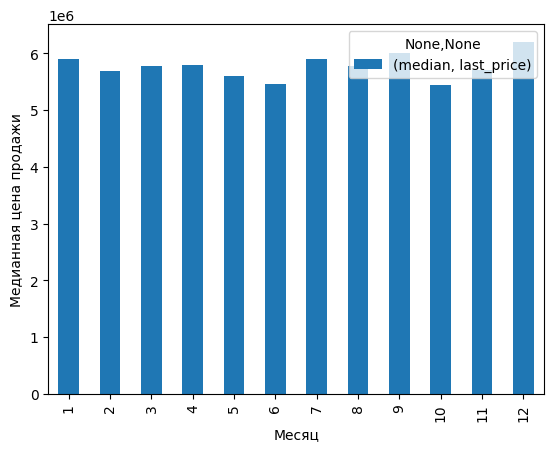

In [94]:
data.pivot_table(index="month_index", values="last_price", aggfunc=["median"]).plot.bar(xlabel="Месяц", ylabel="Медианная цена продажи");

По времени года заметно, что активнее всего объявления о продаже недвижимости публикуют в холодную пору года. Исключение составляют новогодние каникулы и весенние праздники. Цена продажи наибольшая у объявлений, которые публикуют в декабре, сентябре и июле.

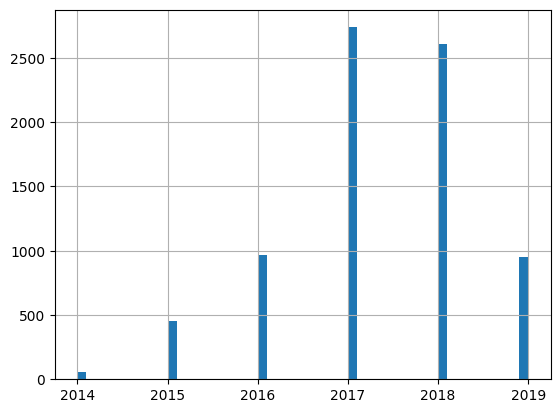

In [95]:
data["year_index"].hist(bins=50);

Для более подробного анализа построим столбчатую диаграмму по типам этажей к цене продажи.

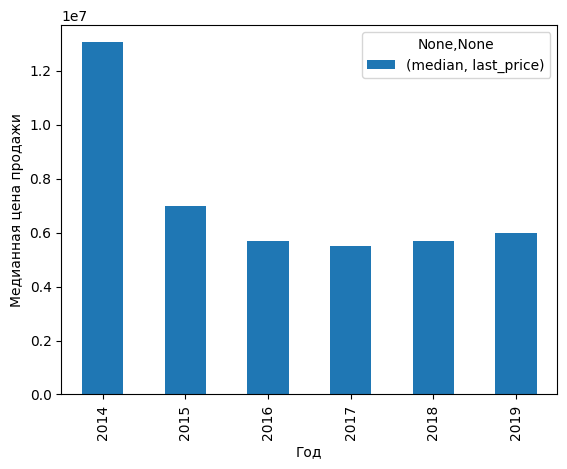

In [96]:
data.pivot_table(index="year_index", values="last_price", aggfunc=["median"]).plot.bar(xlabel="Год", ylabel="Медианная цена продажи");

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v3:</b> 
<br>Код падает с ошибкой. Поправь, пожалуйста, что бы я смог принять твой проект
</div>

Можно сделать вывод, что наибольшее количество объявлений о продажах на этой платформе размещалось в 2017 году. После 2017 года начался постепенный спад, который резко увеличился к 2019 году. При этом медианная цена продажи падала до 2017 года и медленна начала расти к 2019.

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Рассчитывать корреляцию Пирсона для категории этажа, дня, месяца и года продажи не эффективно, так как цена в данном случае зависит от них не линейно (это категориальные переменные). Чтобы изучить зависимость для этих параметров лучше построить bar plot или гистограмму рассчитав среднее значение или медиану
    
    https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
    
<br>Тебе нужно удалить расчет корреляции для этих параметров и построить графики
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Проанализировал гистограммы для категориальных данных.
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v2:</b> 
<br>Параметры изучены неверно. Построй сводную таблицу методом pivot_table, в index передай floor_type, в values общую цену, в aggfunc медиану. К этой таблице примени .plot.bar(). По аналогии сделай для всех трёх времен)
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Построил необходимые типы графиков с комментариями и переписал выводы.
</div>

Можно сделать вывод, что основными характеристиками данных, влияющими на цену, являются характеристики площади и количества комнат. При этом дата размещения объявления практически не влияет на цену продажи. Незначительно влияют этаж недвижимости и год продажи. 

Рассмотрим характеристики, влияющие на цену существенно, подробнее. Для этого изучим диаграммы рассеяния.

Начнём с общей площади нежвижимости.

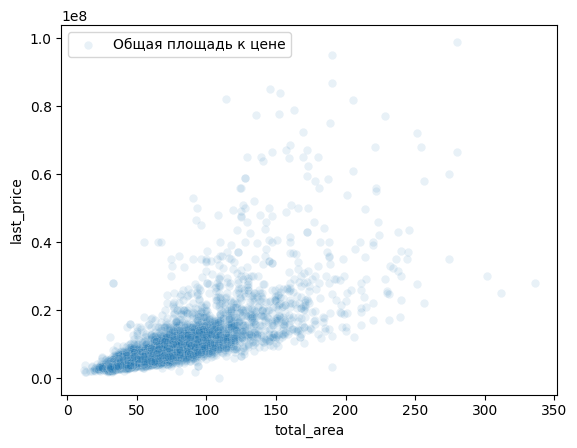

In [97]:
sb.scatterplot(data=features_subset, x="total_area", y="last_price", label="Общая площадь к цене", alpha=.1);

Прослеживается линейная зависимость между ценой и площадью для недвижимости с ценой продажи ниже 20_000_000 и общей площадью менее 150 квадратных метров.

Далее рассмотрим жилую площадь нежвижимости.

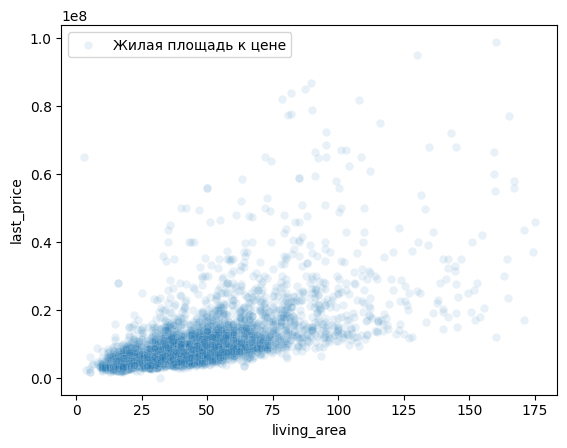

In [98]:
sb.scatterplot(data=features_subset, x="living_area", y="last_price", label="Жилая площадь к цене", alpha=.1);

Для жилой площади линейность в зависимости с ценой прослеживается более явно и сильно искажается при цене более 20_000_000.

Рассмотрим площадь кухни с влиянием на цену.

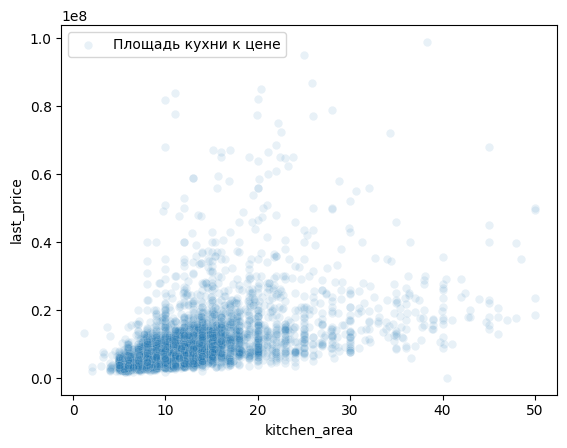

In [99]:
sb.scatterplot(data=features_subset, x="kitchen_area", y="last_price", label="Площадь кухни к цене", alpha=.1);

На графике прослеживается дискретность в площади кухонь. Так же явно видна линейная зависимость при цене ниже 20_000_000

Посмотрим на связь между количеством комнат и ценой.

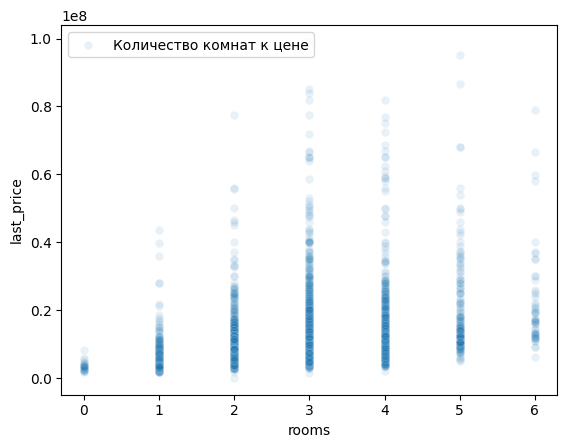

In [100]:
sb.scatterplot(data=features_subset, x="rooms", y="last_price", label="Количество комнат к цене", alpha=.1);

Характер зависимости больше напоминает кривую. При этом больше всего ценится недвижимость с 3 комнатами. Ценность растёт при возрастании количества от 1 к 3 комнатам и потом постепенно, медленнее чем росла, падает, для недвижимости с 6 комнатами. При этом для недвижимости с ценами более 40_000_000 количество комнат более двух слабо определяет цену.

Рассмострим обще цены на недвижимость в населённых пунктах региона.

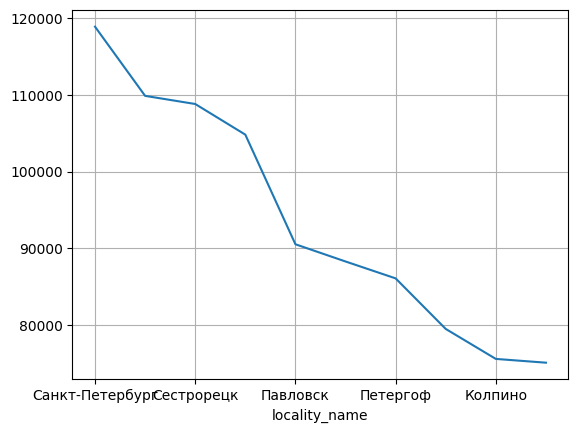

In [101]:
top10_locations_prices = data.pivot_table(index="locality_name", values="square_price", aggfunc=["count", "mean"])
top10_locations_prices.columns = ["count", "mean"]
top10_locations_prices = top10_locations_prices.sort_values(by="count", ascending=False).iloc[:10].sort_values(by="mean", ascending=False)
top10_locations_prices["mean"].plot(grid=True);

Как и ожидалось, цена Питерский недвижимости наиболее дорогая в регионе. Самая дешёвая недвижимость в Ленинградской области, если ограничиться 10 населёнными пунктами, в Выборге.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Всё верно! Как вариант, тут можно построить барплот для топ10 по средней цене, так будет более наглядно)
</div>

Теперь рассмотрим, как цена недвижимости меняется в Санкт-Петербурге в зависимости от удалённости от центра города.

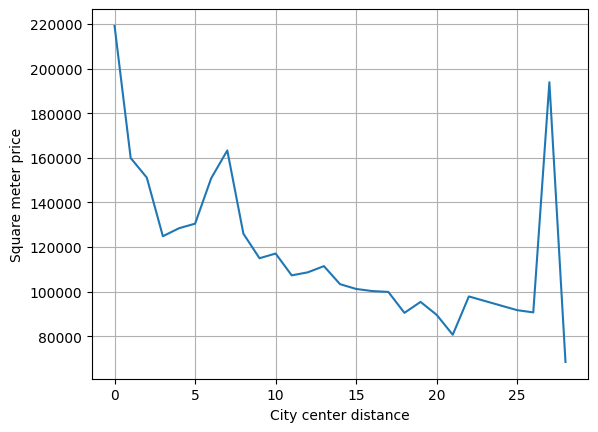

In [102]:
spb_centered_price = data[data["locality_name"] == "Санкт-Петербург"].pivot_table(index="city_center_km", values="square_price", aggfunc="mean")

plt.plot(spb_centered_price)
plt.xlabel("City center distance")
plt.ylabel("Square meter price")
plt.grid()

Как и предполагалось, цена метра в центре города наиболее высока и постепенно падает в зависимости от удаления от центра. Интересно заметить, что на 6-7, 19-20 и 27 километрах цена возрастает. В случае с 6-7 и 27 километрами рост весьма резкий.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Отличный анализ 👍
</div>

### Напишите общий вывод

В исследовании была произведена подготовка данных:
 - подробное изучение зависимостей между данными
 - анализ и заполнение пропусков в данных
 - устранение дубликатов

После для удобства были созданы синтетические атрибуты данных.

Подробно ознакомились с основными характеристиками, влияющими на целевой показатель - цену.

Анализ основных характеристик показал, что:
 - выявлена **линейная зависимость** между **ценой** и **общей площадью** для недвижимости с ценой продажи ниже 20_000_000 и общей площадью менее 150 квадратных метров
 - выявлена **линейность** в зависимости **жилой площади** с **ценой**, которая **искажается** при **цене более 20_000_000**
 - выявлена **линейнай зависимость** **площади кухни** от **цены** при цене ниже 20_000_000
 - выявлен **нелинейный** тип **зависимости** **цены** от **количества комнат**. Ценность **растёт** при возрастании количества **от 1 к 3 комнатам** и потом постепенно, медленнее чем росла, **падает** для недвижимости **с 6 комнатами**. При этом для недвижимости с **ценами более 40_000_000 количество комнат** более двух **слабо определяет цену**.
 - **больше** всего недвижимости продаётся **на втором этаже**. **Больше** всего **зданий**, в которых продаётся недвижимость, **пятиэтажные**. **Дороже** всего недвижимость продаётся **в середине здания** и **дешевле** всего **на первом этаже**.
 - Новые объявления в основном **публикуются** в **рабочие дни** ближе к **середине** рабочей **недели** и **цена продажи** почти **не зависит** от **дня публикации** объявления. 
 - **Чаще** публикуются новые объявления **в холодную пору года** с исключениями во время новогодных и весенних каникул. **Цена** продажи **наибольшая** у объявлений, которые **публикуют** в **декабре, сентябре и июле**.
 - Количество объявлений плавно **росло с 2014 до 2017 года** и **резко сократилось** после плато 2018 года в **2019** году. При этом медианная **цена** продажи **падала до 2017** года и медленна **начала расти к 2019**. 

Были выявлены населённые пункты с **наибольшей** и **наименьшей ценой** нежвижимости: **Санкт-Петербург** и **Выборг**, соответственно.

Построен наглядный график изменения цены квадратного метра.

**Цена метра** в центре города наиболее высокая и постепенно **убывает** в зависимости от удаления **от центра**. На 6-7 километрах, 19-20 и 27 километрах **цена локально теряет монотонность**. В случае с 6-7 и 27 километрами изменения весьма резкие.

<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v1:</b> 
<br>Необходимо поправить:
<br>- не заполнять пропуски в столбцах с картографическими данными	
<br>- не заполнять пропуски в столбце days_exposition
<br>- корректно изучить зависимость цены от категории этажа и времени публикации объявления

<br>После всех внесённых правок не забудь поправить выводы там, где это необходимо
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Добавил выводы об анализе категориальных признаков.
</div>

<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v2:</b> 
<br>Необходимо поправить:
<br>- корректно изучить зависимость цены от категории этажа и времени публикации объявления

<br>После всех внесённых правок не забудь поправить выводы там, где это необходимо
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Добавил выводы после анализа сводных таблиц.
</div>

<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v3:</b> 
<br>Необходимо поправить код, падающий с ошибкой

</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Прошу прощения. Не проверил 😅. Параметр функции не x, а xlabel =)
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.